<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #5**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. 단순 베이즈 분류기를 이용한 iris 데이터셋 분석

가우시안 나이브 베이즈 모델의 학습과 시각화를 위해 iris 데이터 셋을 사용할 것이다. 우선 모델의 시각화를 위해 seaborn 패키지를 설치하고 데이터가 어떻게 생겼는지 확인해보도록 하자.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


데이터의 수는 150개고 꽃받침의 길이나 너비, 꽃잎의 길이와 너비 등과 같은 feature가 있다. 이번 실습에서는 iris 데이터 셋의 두가지 feature만 사용해서 2차원 시각화를 하고 데이터를 확인한다. 두 가지 feature는 sepal length와 sepal width를 쓰도록 한다.  우선 각각의 target 데이터에 대해 sepal length와 sepal width의 관계가 어떻게 될 지를 pairplot을 통해 알아본다. 그후 target 별로 petal length와 petal width 각각의 관계를 각각 FacetGrid, boxplot을 통해 데이터를 시각화한다. 위의 과정을 순서대로 나열하면 아래와 같다.

In [ ]:
import seaborn as sn

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


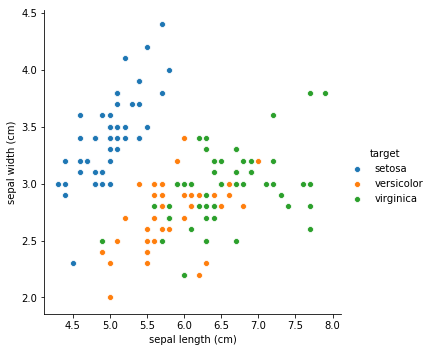

In [ ]:
sn.pairplot(iris_frame,
            x_vars=["sepal length (cm)"],
            y_vars=["sepal width (cm)"],
            hue = "target", 
            size=5)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


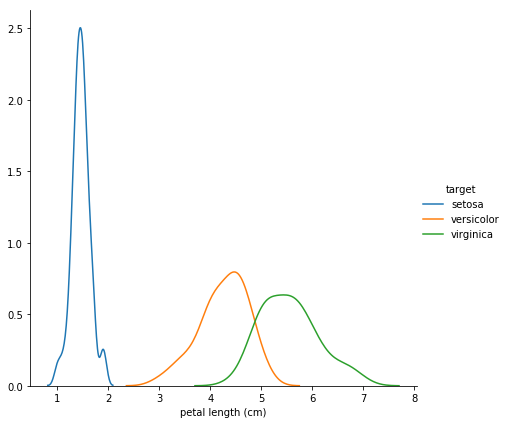

In [ ]:
sn.FacetGrid(iris_frame,
            hue="target",
            size=6).map(sn.kdeplot, "petal length (cm)").add_legend()

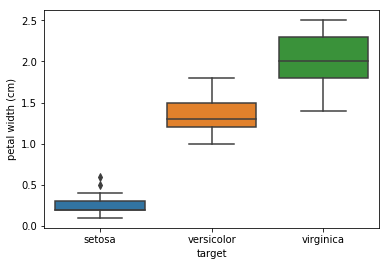

In [ ]:
sn.boxplot(x="target",y="petal width (cm)",
          data=iris_frame)

우리는 Feature 중 sepal에 관련된 두 개의 feature만 이용해서 학습할 것이다. 따라서 이외의 feature는 제거해준다. 그리고 target 값은 현재의 string에서 숫자로 변환해준다. 

그 후 격자 안의 모든 점을 가우시안 나이브 베이즈 모델을 이용하여 예측하고 해당 예측을 통해서 decision boundary를 visualization해준다. 결과는 아래와 같다. 

In [ ]:
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB 
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
NB=GaussianNB() 
NB.fit(X,Y)
N=100

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Gaussian Naive Bayes boundaries')

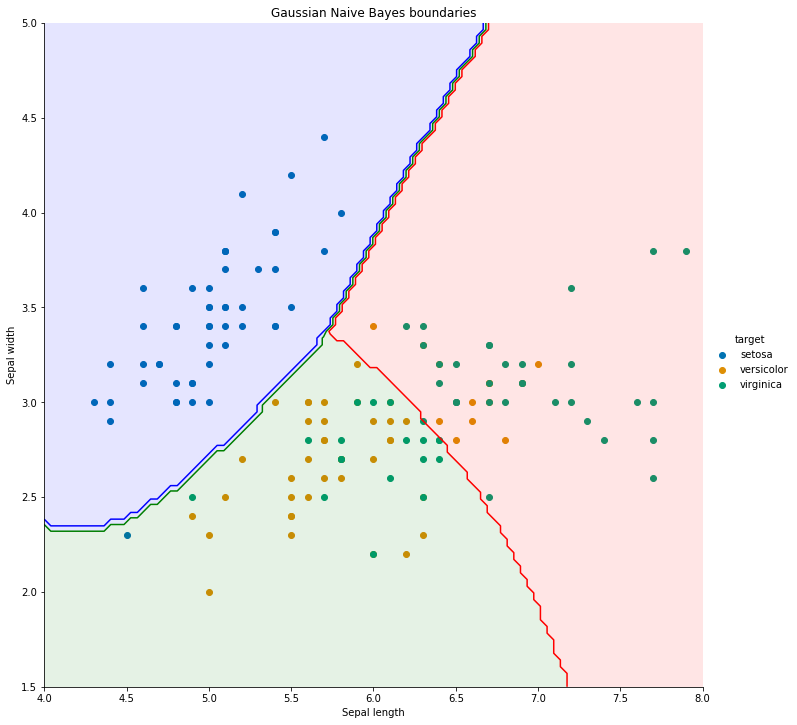

In [ ]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sn.FacetGrid(iris_frame, hue = "target", size =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [NB.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes boundaries')

Setosa는 예측을 잘했지만 versicolor와 virginica는 정확하게 예측하지 못한 것을 확인할 수 있다. 아마 sepal width와 sepal length 두가지의 feature가 아닌 다른 feature를 선택한다면 더 좋은 결과를 얻을 수 있을 것이다.